---
title: How 3SEB works?
subject: Tutorial
subtitle: Quick overview of 3SEB and and its py3SEB code implementation
short_title: 3SEB
authors:
  - name: Vicente Burchard-Levine
    affiliation:
      - Insituto de Ciencias Agrarias
      - CSIC
    orcid: 0000-0003-0222-8706
    email: vburchard@ica.csic.es
  - name: Héctor Nieto
    affiliations:
      - Instituto de Ciencias Agrarias, ICA
      - CSIC
    orcid: 0000-0003-4250-6424
    email: hector.nieto@ica.csic.es
  - name: Benjamin Mary
    affiliations:
      - Insituto de Ciencias Agrarias
      - CSIC
    orcid: 0000-0001-7199-2885
license: CC-BY-SA-4.0
keywords: TSEB, radiation, Beer-Lambert law, albedo
---

# Summary
This interactive Jupyter Notebook has the objective of showing the implemenation of 3SEB-PT model in the [**py3SEB package**](https://github.com/VicenteBurchard/py3SEB).

# Instructions
Read carefully all the text and follow the instructions.

Once each section is read, run the jupyter code cell underneath (marked as `In []`) by clicking the icon `Run`, or pressing the keys SHIFT+ENTER of your keyboard. A graphical interface will then display, which allows you to interact with and perform the assigned tasks.

To start, please run the following cell to import all the packages required for this notebook. Once you run the cell below, an acknowledgement message, stating all libraries were correctly imported, should be printed on screen.

In [1]:
from pathlib import Path
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display
import numpy as np
from pyTSEB import TSEB
from py3seb import py3seb

print('libraries imported correctly')

libraries imported correctly


# The 3SEB model

The 3SEB model ([**Burchard-Levine et al. 2022**](https://doi.org/10.1111/gcb.16002)) is an adapted version of the TSEB model [**Norman et al. (1995)**](https://doi.org/10.1016/0168-1923(95)02265-Y), where an additional vegetation source is incorporated into TSEB to better characterize agro-ecosystems with multiple vegetation layers that have distinct structural and physiological features. This adaptation was initially envisioned for savanna-like ecosystems which are characterized by the co-existence of trees and herbaceous species with very different structural and phenological dynamics. 

However, the 3SEB model structure is also well adapted for perennial tree crops that have cover crops in the interrow, such as vineyards, olive orchards, almonds etc. In principle, the 3SEB model is more suited to represent the complex interactions between a clumped vegetation source planted in rows with an additional herbaceous vegetation source located in the interrows. 

:::{figure} ./input/figures/ThreeSource_scheme_v3_highres.png
:alt: 3SEB resistances scheme
:name: 3seb-scheme
Three-Source energy balance scheme for transport sensible heat (H). From [**Burchard-Levine et al. 2022**](https://doi.org/10.1111/gcb.16002)
:::

In 3SEB, the energy balance is therefore separated between the vegetation overstory (ov), vegetation understory (un) and soil (s) sources as: 

:::{math}
:label:eq-eb
  R_{n} & \approx H + \lambda E + G\\
  R_{n,ov} & \approx H_{ov} + \lambda E_{ov}\label{eq:Energy_Balance_TSEB}\\
  R_{n,un} & \approx H_{un} + \lambda E_{un}\label{eq:Energy_Balance_TSEB}\\
  R_{n,s} & \approx H_{s} + \lambda E_{s} + G
:::

The energy balance equations are simplified as they neglect additional components of the energy balance that are usually neglected, such as heat advection, storage of energy in the canopy layer or energy for the fixation of CO2, which are not computed by the model. 

As such, Remote sensing-based Energy Balance Models rely on the ability of the radiometric information to estimate, net radiation, soil heat flux and sensible heat flux to estiamte LE or ET as the residual of the energy balance. 

To see how py3SEB works we will run several pieces of code to estimate each of the components of the energy balance.





# Summary

This notebook will introduce users on how to run the three-source energy balance (3SEB) model in a vineyard site with the presence of cover crops in the interrow. The 3SEB model is more suited to represent the complex interactions between a clumped vegetation source planted in rows with an additional herbaceous vegetation source located in the interrows. 

:::{figure}./input/figures/vineyard.png
:alt: vineyard
:name: vineyard

Source elements in a vineyard with cover crop. Similar structure can be found in other perennial crops such as olive orchards, almonods, pistachio, as well as agroforestry systems and savannas.
:::

This exercise will use the 3SEB Python implementation ([**py3SEB**](https://github.com/VicenteBurchard/py3SEB)), which essentially adds an aditional vegetation source to the well-known TSEB model. The code is largely based on [**pyTSEB**](https://github.com/hectornieto/pyTSEB).
 
This exercise will make use of data acquired in the context of the GRAPEX project and will replicate some of the results of the analysis performed in [**Burchard-Levine et al. 2022**](https://doi.org/10.1007/s00271-022-00787-x) published in Irrigation Science. 

For additional information on the 3SEB model, please refer to [**Burchard-Levine et al. 2022**](https://doi.org/10.1111/gcb.16002), published in Global Change Biology, which introduced this model.


# Running [py3SEB](https://github.com/hectornieto/3SEB)

The first step is to open all relevant files with the necesary data and information to run 3SEB. Basically 3SEB requires the same input forcing as TSEB, and can found in [./input/meteo/](./input/meteo/) folder. In addition we will also use the same time series of the daily LAI product, stored in  [./input/canopy/](./input/canopy/).

:::{important}
In the article [**Burchard-Levine et al. 2022**](https://doi.org/10.1007/s00271-022-00787-x), the study concentrated on the Ripperdan 720 sites. It should be noted that only **Ripperdan 720-3** and **720-4** had the presence of cover crops during years 2019 and 2020
:::

:::{table}
:name: tab-site-description
Description of GRAPEX sites

Site | Latitude | Longitude | Elevation (m) | Row direction (deg.) | Row spacing (m) | Min. height (m) | Max. height (m) | Min. width (m) | Max. width (m) | TA height (m) | WS height (m)
:-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --:
Ripperdan 720-1 | 36.849 | -120.176 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-2 | 36.849 | -120.174 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-3 | 36.848 | -120.176 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-4 | 36.848 | -120.174 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Barrelli_007 | 38.753 | -122.98 | 113 | 135 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4 | 4
Barrelli_012 | 38.751369 | -122.974658 | 112 | 45 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4.4 | 4.4
Sierra Loma-north | 38.289338 | -121.117764 | 38 | 90 | 3.35 | 1.42 | 2.25 | 0.5 | 2.6 | 5 | 5
Sierra Loma-south | 38.280488 | -121.117597 | 37 | 90 | 3.35 | 1-42 | 2.25 | 0.5 | 2 | 5 | 5
Ripperdan 760 | 36.839025 | -120.21014 | 58 | 90 | 2.74 | 1.2 | 2.5 | 0.5 | 1.8 | 5.5 | 5
Barrelli_016 | 38.747 | -122.963 | 112 | 135 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4 | 4
:::

## Select a site
As an example, we suggest to work with data collected over **Block 3** of the **Ripperdam** site from **2019**, as this site had a cover crop present during this year. But you can select any other site for comparison.

In [3]:
w_site = widgets.Dropdown(
    options=[('Sierra Loma N', "slmN"), ('Sierra Loma S', "slmS"), 
             ('Barrelli 007', "bar007"), ('Barrelli 012', "bar012"),
             ('Ripperdan 760', "rip760"), 
             ('Ripperdan 720-1', "rip720_1"),  ('Ripperdan 720-2', "rip720_2"),  ('Ripperdan 720-3', "rip720_3"),  ('Ripperdan 720-4', "rip720_4")],
    value="rip720_3",
    description='Site:',
)
display(w_site)

Dropdown(description='Site:', index=7, options=(('Sierra Loma N', 'slmN'), ('Sierra Loma S', 'slmS'), ('Barrel…

## We read and merge the micrometeorology and LAI tables

In [4]:
# Import Python libraries
from pathlib import Path
import pandas as pd

# Set the LAI and readiation folders
input_dir = Path().absolute() / "input"
lai_dir = input_dir / "canopy"
ec_dir = input_dir / "meteo"
# Set the input files based on the chosen site
lai_filename = lai_dir / f"FLX_US-{w_site.value}_FLUXNET2015_AUXCANOPY_DD.csv"
ec_filename = ec_dir / f"FLX_US-{w_site.value}_FLUXNET2015_SUBSET_HR.csv"
print(f"LAI file path is {lai_filename}")
print(f"EC file path is {ec_filename}")

# Read the LAI and radiation tables
lai = pd.read_csv(lai_filename, sep=";", na_values=-9999)
ec = pd.read_csv(ec_filename, sep=";", na_values=-9999)

# Merge both tables by date
ec["TIMESTAMP"] = pd.to_datetime(ec["TIMESTAMP"], format="%Y%m%d%H%M")
lai["DATE"] = pd.to_datetime(lai["TIMESTAMP"], format="%Y%m%d").dt.date
lai = lai.drop(labels=["TIMESTAMP"], axis=1)
ec["DATE"] = ec["TIMESTAMP"].dt.date
ec = ec.merge(lai, on="DATE")

# We discard all cases at night (SW_IN <=0)
ec = ec[ec["SW_IN"] > 0]

# Convert Celsius to Kelvin
ec["TA"] = ec["TA"] + 273.15
# Convert kPa to hPa
ec["PA"] = 10 * ec["PA"]

# Evaluate different energy balance closure corrections
ec["H_RES"] = ec["NETRAD"] - ec["G"] - ec["LE"]
ec['LE_RES'] = ec['NETRAD'] - ec['G'] - ec['H']
ec["LE_BR"], ec["H_BR"] = TSEB.met.bowen_ratio_closure(ec["NETRAD"], ec["G"],
                                                       ec["H"], ec["LE"])
# Mean of uncorrected, ressidual and Bowen Ratio
ec["H_ENS"] = np.nanmean([ec["H_RES"], ec["H_BR"], ec['H']], axis=0)
ec["LE_ENS"] = np.nanmean([ec["LE_RES"], ec["LE_BR"], ec['LE']], axis=0)

LAI file path is /Users/vicenteburchard/Nextcloud/1_Projects/ILINK24/Workshop_3SEB_UCDavis/py3SEB-workshop/input/canopy/FLX_US-rip720_3_FLUXNET2015_AUXCANOPY_DD.csv
EC file path is /Users/vicenteburchard/Nextcloud/1_Projects/ILINK24/Workshop_3SEB_UCDavis/py3SEB-workshop/input/meteo/FLX_US-rip720_3_FLUXNET2015_SUBSET_HR.csv


/var/folders/1_/y0yzlfqx3m75gf1153l99fv00000gn/T/ipykernel_4245/20355468.py:40: RuntimeWarning: Mean of empty slice
  ec["H_ENS"] = np.nanmean([ec["H_RES"], ec["H_BR"], ec['H']], axis=0)
/var/folders/1_/y0yzlfqx3m75gf1153l99fv00000gn/T/ipykernel_4245/20355468.py:41: RuntimeWarning: Mean of empty slice
  ec["LE_ENS"] = np.nanmean([ec["LE_RES"], ec["LE_BR"], ec['LE']], axis=0)


## Site Description 
Here we initialize relevant information related to the site characteristics including geographical position (lat/lon) and vineyard row direction/dimensions

In [5]:
import yaml
yaml_file = input_dir / "site_description.yaml"
site_dict = yaml.safe_load(yaml_file.read_text())
lat = float(site_dict["lat"][w_site.value])
lon = float(site_dict["lon"][w_site.value])
elev = float(site_dict["elev"][w_site.value])
row_direction = float(site_dict["row_direction"][w_site.value])
interrow = float(site_dict["interrow"][w_site.value])
hc_min = float(site_dict["hc_min"][w_site.value])
hc_max = float(site_dict["hc_max"][w_site.value])
wc_min = float(site_dict["wc_min"][w_site.value])
wc_max = float(site_dict["wc_max"][w_site.value])
zh = float(site_dict["zh"][w_site.value])
zm = float(site_dict["zm"][w_site.value])

print(f"{w_site.label} has the following site characteristics:\n"
      f"\t Latitude: {lat} deg. \n"
      f"\t Longitude: {lon} deg. \n"
      f"\t Elevation: {elev} m \n"
      f"\t Row direction: {row_direction} deg. \n"
      f"\t Row spacing: {interrow} m \n"
      f"\t Min. canopy height: {hc_min} m \n"
      f"\t Max. canopy height: {hc_max} m \n"
      f"\t Min. canopy width: {wc_min} m \n"
      f"\t Max. canopy width: {wc_max} m \n"
      f"\t Air temperature measurement height: {zh} m \n"
      f"\t Wind speed temperature measurement height: {zh} m")

Ripperdan 720-3 has the following site characteristics:
	 Latitude: 36.848 deg. 
	 Longitude: -120.176 deg. 
	 Elevation: 61.0 m 
	 Row direction: 90.0 deg. 
	 Row spacing: 3.35 m 
	 Min. canopy height: 1.2 m 
	 Max. canopy height: 2.2 m 
	 Min. canopy width: 0.5 m 
	 Max. canopy width: 2.25 m 
	 Air temperature measurement height: 4.0 m 
	 Wind speed temperature measurement height: 4.0 m


## Estimate vegetation traits 

### Separation of grapevine and cover crop LAI
3SEB has very similar data requirements to TSEB but a key distinction is the need to separate biophsyical properties for the two vegetation sources, in this case the grapevine and cover crop. There is no general formula to separate or unmix LAI from the different vegetation sources, there are potentially many differnt methods that can be used. 

In this exercise, we will exploit the fact the grapevines and cover crops have different phenological dynamics and we will use this to separate the total LAI values into each component as described in [**Burchard-Levine et al. 2022**](https://doi.org/10.1007/s00271-022-00787-x)

The daily ecosystem LAI were acquired over each tower footprint at 30 m resolution by merging satellite data from the Harmonized Landsat and Sentinel-2 (HLS) surface reflectance and MODIS LAI data product together with in situ LAI measurements [**Kang et al. 2022**](https://doi.org/10.1007/s00271-022-00798-8). The LAI over each tower footprint was extracted from 3 × 3 30 m pixels, thus including vine and cover crop (CC) contributions. 

The CC normally has a growing phase during early spring and then is mowed in early summer becoming senescent stubble during the main grapevine growing period between May and August. Therefore, the CC LAI ($LAI_{cc}$) was assumed to contribute completely to the total ecosystem LAI ($LAI_{eco}$) before the vine bud-break (~spring) and after vine leaf-off during the fall. The $LAI_{cc}$ was simulated to exponentially decay from spring until the peak summer period and then exponentially re-grow during the fall period after the vine leaf-off from [](#lai-timeseries). 

:::{figure} ./input/figures/lai_partitioning.png
:alt: LAI time series
:name: lai-timeseries

Time series of ecosystem LAI (LAIeco) from satellite imagery (Kang et al., 2022) from block 3 of 2019 decomposed into vine (LAIvine) and cover crop (LAIcc) LAI based on seasonal dynamics. Source: [](https://doi.org/10.1007/s00271-022-00787-x)
:::

Seasonal transitions dates were corroborated with in situ phenocam data. Subsequently, LAIcc was subtracted from the ecosystem LAI to obtain vine LAI (LAIvine)

:::{math}
LAI_{vine} = LAI_{eco} - LAI_{cc}
:::

In [8]:
# Set key seasonal transitions (DOY) obtained from phenocam
bud_break = 97
spring_start = 130
summer_end = 330
# set a minimum of cover crop LAI 
lai_cc_min = 0.2  # do not set to 0 or very low values. This will make model unstable due to equations that use LAI in denominator i.e. Rx

# get day of year array
doy = ec['TIMESTAMP'].dt.dayofyear

mid_summer = int((spring_start + summer_end) / 2)
cc_senescence = int((spring_start + mid_summer) / 2)
cc_regrowth = int((mid_summer + summer_end) / 2)

# =======================================
# 2.1.3 simulate growth/decay of cover crop
# =======================================

#initialize LAI/fg vine and LAI/fg CC
lai_cc = np.full_like(ec['LAI'].values, lai_cc_min)
fg_cc = np.ones_like(ec['LAI'].values)

# --- before vine bud-break
# before bud-break all LAI is atributed to cover crop (CC)
lai_cc[doy <= bud_break] = ec['LAI'].values[doy <= bud_break]

# --- cover crop decay
# When vine bud breaks, exponential decay until mid summer period
# mid summer period cover crop is as minimum

### get doy array associated with cover crop decay
doy_decay = doy[np.logical_and(doy > bud_break, doy < mid_summer)]
## simulate exponetnial decay during senescence
lai_cc_decay = np.logspace(np.log(lai_cc[doy == bud_break][0]), np.log(lai_cc_min),doy_decay.size, base=np.exp(1))
lai_cc[doy_decay] = lai_cc_decay

# do same for green fraction 
fg_cc_decay = np.logspace(np.log(1), np.log(0.01), doy_decay.size, base=np.exp(1))
fg_cc[doy_decay] = fg_cc_decay

# --- autumn regrowth

#autumn regrowth (and vine leaf off)
doy_regrow = doy[np.logical_and(doy > cc_regrowth, doy <= summer_end)]
# simulate exponential growth during autumn regrowth
lai_cc_regrow = np.logspace(np.log(lai_cc[doy == cc_regrowth][0]), np.log(ec['LAI'].values[doy==summer_end][0]),doy_regrow.size, base=np.exp(1))
lai_cc[doy_regrow] = lai_cc_regrow

# same for green fraction 
fg_cc_regrow = np.logspace(np.log(0.01), np.log(1), doy_regrow.size, base=np.exp(1))
fg_cc[np.logical_and(doy > cc_regrowth, doy <= summer_end)] = fg_cc_regrow
fg_cc[np.logical_and(doy >= mid_summer, doy <= cc_regrowth)] = 0.01

# ---post-autumn/winter

# all LAI is CC after summer
lai_cc[doy>summer_end] = ec['LAI'].values[doy>summer_end]

# =======================================
# 2.1.4 get grapevine LAI/fg
# =======================================

#get LAI vine but suctracting LAIcc from LAI
lai_vine = ec['LAI'].values - lai_cc
# set minimum of LAI to 0.4 (taking into account branches/trunk effect)
lai_vine[lai_vine<0.4] = 0.4
fg_vine = np.full_like(lai_vine, 1)
print('Done!')

Done!


#### Visualize LAI partitioning

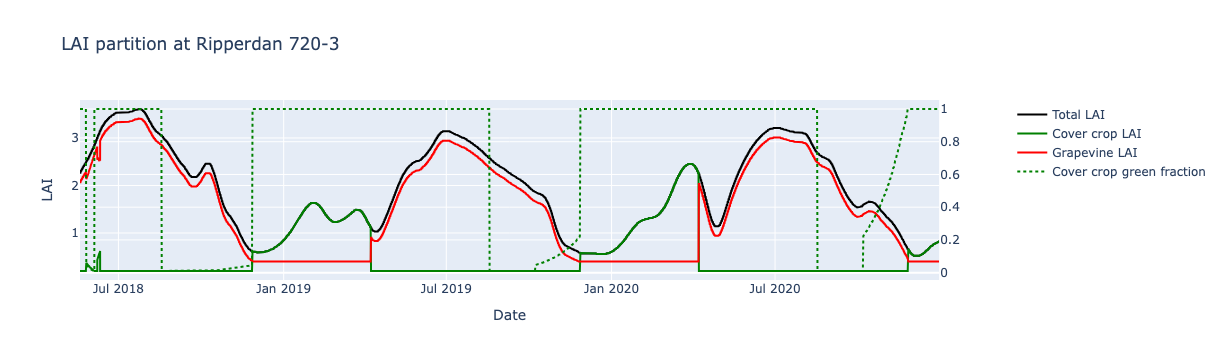

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=ec["TIMESTAMP"].values, y=ec['LAI'].values, 
                         name="Total LAI", mode="lines", line={"color": "black"}))

fig.add_trace(go.Scatter(x=ec["TIMESTAMP"].values, y=lai_cc, 
                         name="Cover crop LAI", mode="lines", line={"color": "green"}))
fig.add_trace(go.Scatter(x=ec["TIMESTAMP"].values, y=lai_vine, 
                         name="Grapevine LAI", mode="lines", line={"color": "red"}))
fig.add_trace(go.Scatter(x=ec["TIMESTAMP"].values, y=fg_cc, 
                         name="Cover crop green fraction", mode="lines", line={"color": "green", "dash": "dot"}),
              secondary_y=True)
fig.update_layout(title_text=f"LAI partition at {w_site.label}",
                  xaxis_title="Date", yaxis_title="LAI")

## Estimate the structural variables based on Earth Observation LAI timeseries

The structural traits for the vineyard, such as canopy height (hc) and fractional cover (fc), are estimated from empirical equations developed for this site as described in [](https://doi.org/10.1007/s00271-018-0611-y). For canopy height and fractional cover, we used the same empirical equations as in previous exercises. 

:::{figure} ./input/figures/vineyard_structural_functions.png
:alt: Empirical structural functions
:name: structural-functions
Empirical models relating canopy height , canopy width and the bottom of the canopy with the fused STARFM LAI. Solid dots represent in situ measured values
:::

:::{note}
:class: dropdown
Structural traits could also be prescribed based on a land cover map or, even better with LiDAR/PhoDAR information
:::


In [ ]:
################################################################################
# Empirical equations to generate canopy structural parameters from LAI
################################################################################
def lai_2_hc(lai, hc_min):
    slope = 0.42
    hc = hc_min + slope * lai
    return hc


def lai_2_hbratio(lai, hc_min):
    hb_ratio_mean = 0.4848388065
    hb_ratio = np.zeros(lai.shape)

    hb_ratio[lai < hc_min] = 1. + ((hb_ratio_mean - 1.) / hc_min) * lai[
        lai < hc_min]
    hb_ratio[lai >= hc_min] = hb_ratio_mean

    return hb_ratio


def lai_2_width(lai, wc_min, wc_max):
    beta = 6.96560056
    offset = 1.70825736

    width = wc_min + (wc_max - wc_min) / (1.0 + np.exp(-beta * (lai - offset)))

    return width


def lai_2_fcover(lai, fc_min, fc_max):
    beta = 7.0
    offset = 1.70

    fcover = fc_min + (fc_max - fc_min) / (1.0 + np.exp(-beta * (lai - offset)))

    return fcover


def lai_2_canopy(lai, hc_min, fc_min, fc_max):
    hc = lai_2_hc(lai, hc_min)
    hb_ratio = lai_2_hbratio(lai, hc_min)
    fcover = lai_2_fcover(lai, fc_min, fc_max)

    return hc, hb_ratio, fcover


# Grapevine height
h_c_vine, hb_ratio_vine, f_c_vine = lai_2_canopy(lai_vine, hc_min, wc_min / interrow, wc_max / interrow)
# clip to maximum and minimum possible
h_c_vine = np.clip(h_c_vine, hc_min, hc_max)
f_c_vine = np.clip(f_c_vine, 0, 1)

and for the herbaceous cover crop we assume a constant canopy heigh and full coverage

In [ ]:
# Crop height
h_c_cc = 0.35
h_c_cc = np.full_like(h_c_vine, h_c_cc)
# Crop coverage
f_c_cc = np.ones_like(h_c_vine)
# Crop width to height ratio
w_c_cc = np.ones_like(h_c_vine)
w_c_ratio_cc = np.ones_like(h_c_vine)

## Estimate vegetation clumping index

Since grapevine canopies are highly clumped and have unique row structures, we will take into account row structure and orientation to calculate the clumping index, which is important when modelling the radiation transmission through the canopy. 

In [ ]:
# =======================================
# Grapevine width
w_c_vine = f_c_vine * interrow
# Grapevine width to height ratio
w_c_ratio_vine = w_c_vine / (h_c_vine - hb_ratio_vine * h_c_vine)
# Grapevine Local LAI
F_vine = lai_vine / f_c_vine

# The time zone is PST, which corresponds to -120 deg, time longitude
stdlon = -120
# Call calc_sun_angles based on site coordinates and timestamp
sza, saa = TSEB.met.calc_sun_angles(
    np.full_like(ec['LAI'].values, lat),
    np.full_like(ec["LAI"].values, lon),
    np.full_like(ec["LAI"].values, stdlon),
    ec['TIMESTAMP'].dt.dayofyear.values,
    ec['TIMESTAMP'].dt.hour.values + ec['TIMESTAMP'].dt.minute.values / 60.)

# Compute the relative sun-row azimuth angle
psi = row_direction - saa
# Compute the clumping index for row crops
omega_vine = TSEB.CI.calc_omega_rows(lai_vine, f_c_vine, theta=sza, psi=psi, w_c=w_c_ratio_vine, x_lad=1)
# effective lai
lai_eff_vine = F_vine * omega_vine

On the other hand, for the cover crop we can assume that it is horizontally homogeneous and non-clumped

## Estimate net radiation transfer through the three sources

We use a beer-lambert (-type) modeling scheme to simulate the radiation transmission through the multiple vegetation canopies adapted from the model described in [**Chapter 15 of Campbell and Norman (1998)**](https://doi.org/10.1007/978-1-4612-1626-1_15). 

:::{seealso}
The full description of the radiation model can be found in [**Campbell and Norman, 1998, Chapter 15**](https://doi.org/10.1007/978-1-4612-1626-1_15) and the deatils regarding the adaption to three sources is found in the supplementary information in [**Burchard-Levine et al. 2022**](https://doi.org/10.1111/gcb.16002)
:::

In [1]:
from py3seb import py3seb

# We need to define the leaf spectral properties for grapevine and cover crop. For simplicity we can just replicate the same values for both
rho_leaf_vis_vine = 0.054
rho_leaf_vis_cc = 0.054
rho_leaf_nir_vine = 0.262
rho_leaf_nir_cc = 0.262
tau_leaf_vis_vine = 0.038
tau_leaf_vis_cc = 0.038
tau_leaf_nir_vine = 0.333
tau_leaf_nir_cc = 0.333
rho_soil_vis = 0.07
rho_soil_nir = 0.32

# Thermal spectra
e_vine = 0.99  # Leaf emissivity
e_cc = 0.99  # Leaf emissivity
e_s = 0.94  # Soil emissivity

# Estimates the direct and diffuse solar radiation
difvis, difnir, fvis, fnir = TSEB.rad.calc_difuse_ratio(ec["SW_IN"].values,
                                                        sza,
                                                        press=np.full_like(sza, 1013.15))
par_dir = fvis * (1. - difvis) * ec["SW_IN"].values
nir_dir = fnir * (1. - difnir) * ec["SW_IN"].values
par_dif = fvis * difvis * ec["SW_IN"].values
nir_dif = fnir * difnir * ec["SW_IN"].values

# net radiation transmission through the three sources
sn_vine_3seb, sn_s_3seb, sn_cc_3seb = py3seb.calc_Sn_Campbell(lai_vine, 
                                                              lai_cc, 
                                                              sza, 
                                                              par_dir + nir_dir, 
                                                              par_dif + nir_dif, 
                                                              fvis, 
                                                              fnir,
                                                              np.full_like(lai_vine, rho_leaf_vis_vine),
                                                              np.full_like(lai_cc, rho_leaf_vis_cc),
                                                              np.full_like(lai_vine, tau_leaf_vis_vine),
                                                              np.full_like(lai_cc, tau_leaf_vis_cc),
                                                              np.full_like(lai_vine, rho_leaf_nir_vine),
                                                              np.full_like(lai_cc, rho_leaf_nir_cc),
                                                              np.full_like(lai_vine, tau_leaf_nir_vine),
                                                              np.full_like(lai_vine, tau_leaf_nir_cc),
                                                              np.full_like(lai_vine, rho_soil_vis),
                                                              np.full_like(lai_vine, rho_soil_nir), 
                                                              h_c_vine, 
                                                              h_c_vine * hb_ratio_vine, 
                                                              w_c_vine, 
                                                              f_c_vine,
                                                              x_LAD=1, 
                                                              x_LAD_sub=1, 
                                                              LAI_eff=lai_eff_vine,
                                                              LAI_eff_sub=lai_cc)

sn_vine_3seb[~np.isfinite(sn_vine_3seb)] = 0
sn_s_3seb[~np.isfinite(sn_s_3seb)] = 0
sn_cc_3seb[~np.isfinite(sn_cc_3seb)] = 0
print('Done!')

NameError: name 'TSEB' is not defined

### Evaluate net shortwave radiation

In [ ]:
from model_evaluation import double_collocation as dc
daytime = ec["SW_IN"] > 100

sn_3seb = sn_vine_3seb + sn_s_3seb + sn_cc_3seb
sn_obs = ec["SW_IN"].values - ec["SW_OUT"].values

fig = go.Figure()
fig.add_trace(go.Scattergl(x=sn_3seb[daytime], y=sn_obs[daytime], 
                         name="Sn for row crops", mode="markers"))
fig.add_trace(go.Scatter(x=[0, 1000], y=[0, 1000], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}))
fig.update_layout(title_text=f"Observed vs. Estimated below net radiation at {w_site.label}",
                  yaxis_range=[0, 1000], xaxis_range=[0, 1000],
                  xaxis_title="Estimated (W m-2)", yaxis_title="Observed (W m-2)")

## Estimate surface roughness 

We estimate surface roughness using the same frameworks as implemented in TSEB (see ./103-TSEB_introduction.ipynb). 

For tall and woody canopies, in which leaf density and coverage can play a more importan role, pyTSEB can adopt the formulation of Schaudt and Dickinson (2000), which at the same time it relies on the model by [Raupach (1994))(https://doi.org/10.1007/BF00709229)

Since vineyards can be considered as open shrublands or short decidous broadleaved canopies, we will compute roughness based on Schaudt and Dickinson (2000). As inputs we need not only the canopy height, but also the LAI, the fractional cover and the width-to-height canopy ratio 

In the case of 3SEB, we need to estimate the roughness for the overstory vegetation (i.e. grapevine) and the understory vegetation (i.e. cover crop). For the cover crop, we assume herbecaous conditions so we simple use canophy height ratio approach. 

In [ ]:
# Roughness for bare soil
z0_soil = 0.15

# grapevine
# =========
z_0m_vine, d_0_vine = TSEB.res.calc_roughness(lai_vine, h_c_vine, w_c_ratio_vine,
                                              np.ones(lai_vine.shape) * TSEB.res.BROADLEAVED_D,
                                              f_c=f_c_vine)
# Ensure realistic values
d_0_vine[d_0_vine < 0] = 0
z_0m_vine[np.isnan(z_0m_vine)] = z0_soil
z_0m_vine[z_0m_vine < z0_soil] = z0_soil

# cover crop
# ==========
z_0m_cc, d_0_cc = TSEB.res.calc_roughness(lai_cc, h_c_cc, w_c_ratio_cc,
                                          np.ones(lai_cc.shape) * TSEB.res.GRASS,
                                          f_c=f_c_cc)

# Ensure realistic values
d_0_cc[d_0_cc < 0] = 0
z_0m_cc[np.isnan(z_0m_cc)] = z0_soil
z_0m_cc[z_0m_cc < z0_soil] = z0_soil
print('Done!')

## TSEB/3SEB processing options and model parameters
In this section, we set-up some processing options related to how we want to run 3SEB, including assigning some values to constant ancillary parameters. These are the same as those set-up to run pyTSEB but again we need to specify the parameters for each vegetaion layer. 

In [2]:
alpha_PT_0 = 1.26

# Grapevine and cover crop leaf width (m)
leaf_width_vine = 0.10
leaf_width_cc = 0.01

# Kustas and Norman boundary layer resistance parameters
roil_resistance_c_param = 0.0038
roil_resistance_b_param = 0.012
roil_resistance_cprime_param = 90.

# Thermal spectra
e_v = 0.99  # Leaf vine emissivity
e_cc = 0.99   # Leaf crop emissivity
e_s = 0.94  # Soil emissivity

## We derive the half-hourly LST based on pyrgeomters on the EC tower

In [ ]:
# Surface emissivity
e_surf = f_c_vine * e_v + (1. - f_c_vine) * e_s

# LST from longwave radiometers
lst = ((ec['LW_OUT'].values - (1. - e_surf) * ec['LW_IN'].values) / (
        TSEB.rad.SB * e_surf)) ** 0.25

# And it is assuming that the radiometer is looking at nadir
vza = np.zeros_like(lst)

# Computing Sensible heat flux with 3SEB

The key distinction of 3SEB is that we need to separate sensible heat fluxes between vegetation overstory, understory and soil layers. All this, using the the radiometric land surface temperature (LST) derived from remote sensing as the key boundary condition. It is assumeed thatthe singular LST observation is the combination of signals stemming from all three sources such as :

:::{math}
:label:eq-3SEB_Trad
LST =(f_{ov}\left(\theta\right)T_{ov}^4+\left[1-f_{ov}\left(\theta\right)\right]T_{sub}^4)^{1/4}\\

\\T_{sub} =(f_{un}\left(\theta\right)T_{un}^4+\left[1-f_{un}\left(\theta\right)\right]T_{s}^4)^{1/4}\\

:::
where $f_c\left(\theta\right)$ is the fraction of vegetation observed by the sensor (either for understory (un) and overstory (ov)). Since the above equationsn[](#eq-3SEB_Trad) consists of three unknowns and only two equations, an iterative process is conducted using to initial guesses of potential canopy transpiration for both vegetation sources, and under the assumption that during daytime hours condensation for the soil/substrate should not occur. The initial canopy latent and sensible heat fluxes are estimated based on the [Priestley and Taylor (1972)](https://doi.org/10.1175/1520-0493(1972)100<0081:OTAOSH>2.3.CO;2) formulation for potential transpiration (Eq. [](#eq-TSEB_PT)) and Eq. [](#eq-eb).


In 3SEB, resistance framework is first treated as a parallel (i.e., uncoupled) tree-substrate system to obtain tree canopy sensible heat flux ($H_C$) and substrate (understory vegetation+soil) ($H_{sub}$) using the heat transport equations:

:::{math}
:label:ec-hc-hsub
H_C &= \rho C_p \frac{T_C - T_{a}} {R_A}\\
H_{sub} &= \rho C_p \frac{T_{sub} - T_{a}} {R_A+R_{sub}}
:::


Subsequently, the substrate fluxes and temperatures are further separated incorporating a series (i.e. coupled) approach:

:::{math}
:label:ec-hcsub-hs
H_{C,sub} &= \rho C_p \frac{T_{C,sub} - T_{ac}} {R_X}\\
H_s &= \rho C_p \frac{T_S - T_{ac}} {R_S}
:::


Since $T_C$, $T_{C,sub}$ and $T_S$ are unknown apriori, the original 3SEB formulation (3SEB-PT) implements a Priestley-Taylor (PT) formulation, as in [Norman et al. (1995)](https://doi.org/10.1016/0168-1923(95)02265-Y), to compute a first estimate of the canopy LE and H for both overstory and understory. 


## Run 3SEB

We are now finally ready to run 3SEB

:::{seealso}
:class:dropdown
The full code for 3SEB model at the [**3SEB GitHub repository**](https://github.com/VicenteBurchard/py3SEB/blob/c89b70e0f95d21338b65efc9cbbf90aac70ba3a0/py3seb/py3seb.py#L58)
:::

In [ ]:
resistance_flag = [0, {"KN_c": np.full_like(lst, roil_resistance_c_param),
                       "KN_b": np.full_like(lst, roil_resistance_b_param),
                       "KN_C_dash": np.full_like(lst, roil_resistance_cprime_param)}]

# Run 3SEB
[flag_3seb, t_s_3seb, t_vine_3seb, t_cc_3seb, t_ac_3seb, ln_sub_3seb, ln_vine_3seb, 
 ln_cc_3seb, ln_s_3seb, le_vine_3seb, h_vine_3seb, le_cc_3seb, h_cc_3seb,
 le_s_3seb, h_s_3seb, g_3seb, r_s_3seb, r_sub_3seb, r_x_3seb, r_a_3seb, u_friction_3seb, 
 l_mo_3seb, n_iterations_3seb] = py3seb.ThreeSEB_PT(lst,
                                                    vza,
                                                    ec["TA"].values,
                                                    ec["WS"].values,
                                                    ec["EA"].values,
                                                    ec["PA"].values,
                                                    sn_vine_3seb,
                                                    sn_s_3seb,
                                                    sn_cc_3seb,
                                                    ec["LW_IN"].values,
                                                    lai_vine,
                                                    lai_cc,
                                                    h_c_vine,
                                                    h_c_cc,
                                                    e_vine,
                                                    e_cc,
                                                    e_s,
                                                    z_0m_vine,
                                                    z_0m_cc,
                                                    d_0_vine,
                                                    d_0_cc,
                                                    zm,
                                                    zh,
                                                    leaf_width=leaf_width_vine,
                                                    leaf_width_sub=leaf_width_cc,
                                                    f_c=f_c_vine,
                                                    f_c_sub=f_c_cc,
                                                    f_g=fg_vine,
                                                    f_g_sub=fg_cc,
                                                    calcG_params=[[1], 0.35],
                                                    resistance_form=resistance_flag)

# ... and finally we compute the bulk fluxes
le_3seb = le_vine_3seb + le_cc_3seb + le_s_3seb
h_3seb = h_vine_3seb + h_cc_3seb + h_s_3seb
netrad_3seb = sn_vine_3seb + sn_cc_3seb + sn_s_3seb + ln_vine_3seb + ln_cc_3seb + ln_s_3seb

# Run TSEB-PT for comparison

Let us also run TSEB-PT for comparison purposes. 

In [ ]:
# Compute the canopy and soil net radiation using Cambpell RTM
sn_c, sn_s = TSEB.rad.calc_Sn_Campbell(ec["LAI"].values,
                                       sza,
                                       par_dir + nir_dir,
                                       par_dif + nir_dif,
                                       fvis,
                                       fnir,
                                       np.full_like(sza, rho_leaf_vis_vine),
                                       np.full_like(sza, tau_leaf_vis_vine),
                                       np.full_like(sza, rho_leaf_nir_vine),
                                       np.full_like(sza, tau_leaf_nir_vine),
                                       np.full_like(sza, rho_soil_vis),
                                       np.full_like(sza, rho_soil_nir),
                                       x_LAD=1,
                                       LAI_eff=lai_eff_vine)

sn_c[~np.isfinite(sn_c)] = 0
sn_s[~np.isfinite(sn_s)] = 0

# TSEB-PT
[flag_pt, ts_pt, tc_pt, t_ac_pt, ln_s_pt, ln_c_pt, le_c_pt, h_c_pt, le_s_pt, h_s_pt, g_pt,
 r_s_pt, r_x_pt, r_a_pt, u_friction_pt, lmo_pt, n_iterations_pt] = TSEB.TSEB_PT(                                                     
     lst,
     vza,
     ec["TA"].values,
     ec["WS"].values,
     ec["EA"].values,
     ec["PA"].values,
     sn_c,
     sn_s,
     ec["LW_IN"].values,
     ec["LAI"].values,
     h_c_vine,
     e_vine,
     e_s,
     z_0m_vine,
     d_0_vine,
     zm,
     zh,
     x_LAD=np.ones_like(lst),
     f_c=f_c_vine,
     f_g=fg_vine,
     w_C=w_c_ratio_vine,
     leaf_width=leaf_width_vine,
     z0_soil=z0_soil,
     alpha_PT=alpha_PT_0,
     resistance_form=resistance_flag,
     calcG_params=[[1], 0.35])

# ... and we compute the bulk fluxes
le_pt = le_c_pt + le_s_pt
h_pt = h_c_pt + h_s_pt
netrad_pt = sn_c + sn_s + ln_c_pt + ln_s_pt

# Model evaluation and visualization

## Evaluate model fluxes at half-hourly scale 

Here, we will first create a scatter plot to evaluate how the modelled fluxes (LE, H, Rn, and G) compare to those measured by the EC tower. We will assess daytime fluxes (i.e. shortwave irradiance > 100 W/m2).

Select which method of EB correction you want to apply during the validation and which year you want to evaluate (considering that cover crop might not be present in all years):

In [ ]:
w_ebc = widgets.Dropdown(
    options=[('No EB correction', ("LE", "H")), 
             ('Residual to LE', ("LE_RES", "H")), 
             ('Residual to H', ("LE_RES", "H")), 
             ('Bowen Ratio', ("LE_BR", "H_BR")),
             ('Ensemble correction', ("LE_ENS", "H_ENS"))],
    value=("LE_ENS", "H_ENS"),
    description='EBC method:',
)

years = np.unique(ec["TIMESTAMP"].dt.year)
w_year = widgets.Dropdown(
    options=years,
    value=2019,
    description='Select year:',
)

display(w_ebc, w_year)

In [ ]:
from tabulate import tabulate

LE_OBS, H_OBS = w_ebc.value
print(f"Using {LE_OBS} and {H_OBS} fields for validating respectively  LE and H")

daytime = ec["SW_IN"] > 100
valid_3seb = np.logical_and(flag_3seb < 5, daytime, ec["TIMESTAMP"].dt.year == w_year.value)
valid_pt = np.logical_and(flag_pt < 5, daytime)

le_marker = {"color": "blue", "size": 3}
h_marker = {"color": "red", "size": 3}
g_marker = {"color": "green", "size": 3}
rn_marker = {"color": "black", "size": 3}

fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=True,
                    horizontal_spacing=0.01,
                    subplot_titles=["3SEB", "TSEB-PT"])

fig.add_trace(go.Scattergl(x=netrad_3seb[valid_3seb], y=ec.loc[valid_3seb, "NETRAD"], 
                         name="Rn 3SEB", mode="markers", marker=rn_marker),
             row=1, col=1)

fig.add_trace(go.Scattergl(x=netrad_pt[valid_pt], y=ec.loc[valid_pt, "NETRAD"], 
                         name="Rn TSEB-PT", mode="markers", marker=rn_marker),
             row=1, col=2)

fig.add_trace(go.Scattergl(x=g_3seb[valid_3seb], y=ec.loc[valid_3seb, "G"], 
                         name="G 3SEB", mode="markers", marker=g_marker),
             row=1, col=1)

fig.add_trace(go.Scattergl(x=g_pt[valid_pt], y=ec.loc[valid_pt, "G"], 
                         name="G TSEB-PT", mode="markers", marker=g_marker),
             row=1, col=2)

fig.add_trace(go.Scattergl(x=le_3seb[valid_3seb], y=ec.loc[valid_3seb, LE_OBS], 
                         name="LE 3SEB", mode="markers", marker=le_marker),
             row=1, col=1)

fig.add_trace(go.Scattergl(x=le_pt[valid_pt], y=ec.loc[valid_pt, LE_OBS], 
                         name="LE TSEB-PT", mode="markers", marker=le_marker),
             row=1, col=2)

fig.add_trace(go.Scattergl(x=h_3seb[valid_3seb], y=ec.loc[valid_3seb, H_OBS], 
                         name="H 3SEB", mode="markers", marker=h_marker),
             row=1, col=1)

fig.add_trace(go.Scattergl(x=h_pt[valid_pt], y=ec.loc[valid_pt, H_OBS], 
                         name="H TSEB-PT", mode="markers", marker=h_marker),
             row=1, col=2)

fig.add_trace(go.Scatter(x=[-200, 800], y=[-200, 800], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}),
             row=1, col=1)
fig.add_trace(go.Scatter(x=[-200, 800], y=[-200, 800], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}),
             row=1, col=2)


fig.update_layout(title_text=f"Observed vs. Estimated hourly turbulent fluxes at {w_site.label}",
                  yaxis_range=[-200, 800], xaxis_range=[-200, 800], 
                  xaxis_title="Estimated (W m-2)", yaxis_title="Observed (W m-2)")
fig.update_xaxes(title_text="Estimated (W m-2)", row=1, col=2)

## LE partitioning evaluation
We will now compare the partitioning of LE from vegetation sources (i.e. transpiration) derived from 3SEB (i.e. LEvine + LEcc) compared to the those measured from the EC flux towers using the ensemble of CEC, REA and FVS approaches {cite:p}`https://doi.org/10.1016/j.agrformet.2021.108790`. 

In [ ]:
ec["LE_C"] = np.nanmean(ec[["LE_C_ECC", "LE_C_REA", "LE_C_FVS"]], axis=1)

le_c_3seb = le_vine_3seb + le_cc_3seb

fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=True,
                    horizontal_spacing=0.01,
                   subplot_titles=("3SEB", "TSEB-PT"))

fig.add_trace(go.Scattergl(x=le_c_3seb[valid_3seb], y=ec.loc[valid_3seb, "LE_C"], 
                         name="LE_C 3SEB", mode="markers", marker=le_marker),
             row=1, col=1)

fig.add_trace(go.Scattergl(x=le_c_pt[valid_pt], y=ec.loc[valid_pt, "LE_C"], 
                         name="LE TSEB-PT", mode="markers", marker=le_marker),
             row=1, col=2)

fig.add_trace(go.Scatter(x=[-200, 800], y=[-200, 800], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}),
             row=1, col=1)
fig.add_trace(go.Scatter(x=[-200, 800], y=[-200, 800], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}),
             row=1, col=2)


fig.update_layout(title_text=f"Observed vs. Estimated hourly canopy latent heat flux {w_site.label}",
                  yaxis_range=[-200, 800], xaxis_range=[-200, 800], 
                  xaxis_title="Estimated (W m-2)", yaxis_title="Observed (W m-2)")

fig.update_xaxes(title_text="Estimated (W m-2)", row=1, col=2)

## Save outputs to an ASCII table

In [ ]:
# Define the output filename
out_dir = Path().absolute() / "output"
outfile = out_dir / f"FLX_US-{w_site.value}_FLUXNET2015_3SEB-ROWS_HR.csv"

# Create the output folder in case it does not exist
if not out_dir.exists():
    out_dir.mkdir(parents=True)

le_3seb = le_vine_3seb + le_cc_3seb + le_s_3seb
h_3seb = h_vine_3seb + h_cc_3seb + h_s_3seb
netrad_3seb = sn_vine_3seb + sn_cc_3seb + sn_s_3seb + ln_vine_3seb + ln_cc_3seb + ln_s_3seb
# Convert the outputs to a Python dictionary
outdict = {"TIMESTAMP": ec["TIMESTAMP"].dt.strftime("%Y%m%d%H%M"),
           "FLAG_3SEB": flag_3seb, "LE_3SEB": le_3seb, "H_3SEB": h_3seb, "NETRAD_3SEB": netrad_3seb, "G_3SEB": g_3seb, 
           "T_S_3SEB": t_s_3seb, "T_CC_3SEB": t_cc_3seb, "T_VINE_3SEB": t_vine_3seb, "T_AC_3SEB": t_ac_3seb, 
           "LN_S_3SEB": ln_s_3seb, "LN_CC_3SEB": ln_cc_3seb, "LN_VINE_3SEB": ln_vine_3seb, "LE_CC_3SEB": le_cc_3seb, "H_CC_3SEB": h_cc_3seb, 
           "LE_S_3SEB": le_s_3seb, "H_S_3SEB": h_s_3seb, "LE_VINE_3SEB": le_vine_3seb, "H_VINE_3SEB": h_vine_3seb, 
           "R_S_3SEB": r_s_3seb, "R_SUB_3SEB": r_sub_3seb, "R_X_3SEB": r_x_3seb, "R_A_3SEB": r_a_3seb, "USTAR_3SEB": u_friction_3seb, 
           "L_MO_3SEB":l_mo_3seb, "ITERATIONS_3SEB": n_iterations_3seb}

# Crete the output dataframe and save it to csv
pd.DataFrame(outdict).to_csv(outfile, sep=";", na_rep=-9999, index=False)
print(f"Saved to {outfile}")

outfile = out_dir / f"FLX_US-{w_site.value}_FLUXNET2015_TSEB-PT-ROWS_HR.csv"

# Convert the outputs to a Python dictionary
outdict = {"TIMESTAMP": ec["TIMESTAMP"].dt.strftime("%Y%m%d%H%M"),
           "FLAG_TSEBPT": flag_pt, "LE_TSEBPT": le_pt, "H_TSEBPT": h_pt, "NETRAD_TSEBPT": netrad_pt, "G_TSEBPT": g_pt, 
           "T_S_TSEBPT": ts_pt, "T_C_TSEBPT": tc_pt, "T_AC_TSEBPT": t_ac_pt, "LN_S_TSEBPT": ln_s_pt, "LN_C_TSEBPT": ln_c_pt, 
           "LE_C_TSEBPT": le_c_pt, "H_C_TSEBPT": h_c_pt, "LE_S_TSEBPT": le_s_pt, "H_S_TSEBPT": h_s_pt, "R_S_TSEBPT": r_s_pt, 
           "R_X_TSEBPT": r_x_pt, "R_A_TSEBPT": r_a_pt, "USTAR_TSEBPT": u_friction_pt, "L_MO_TSEBPT":lmo_pt, 
           "ITERATIONS_TSEBPT": n_iterations_pt}

# Crete the output dataframe and save it to csv
pd.DataFrame(outdict).to_csv(outfile, sep=";", na_rep=-9999, index=False)
print(f"Saved to {outfile}")


# Annual ET accounting
One of the advantages of the 3SEB model is the ability to separate the flux contributions of the different vegetation (+soil) sources. In this section, we will check how much each source (vine, cover crop and soil) contribute to the total ET and account for their annual water use. 

## Instantaneous to daily
We will first convert the instantaneous fluxes to daily, instead of aggregating all hourly 3SEB estimates we will upscale a single estimate (assuming it was obtained by a satellite overpass to daily).

We will use the solar irradiance upscaling method, that assumes that the $\lambda E/ S^\downarrow$ ratio is preserved. Therefore, the daily latent heat fluxes are obtained as:

:::{math}
:label: daily_et
\lambda E_{daily} = S^\downarrow_{daily} \frac{\lambda E_{inst.}}{S^\downarrow_{inst.}}
:::

In [ ]:
# Set the local time of satellie overpass in decimal hours
overpass = 10.5


# Aggregate hourly irradiance and temporature to daily means
ec_daily = ec.groupby(ec["TIMESTAMP"].dt.date)
ec_daily = ec_daily[["SW_IN", "TA"]].mean().reset_index()
# Select only the year of interest
ec_daily["TIMESTAMP"] = pd.to_datetime(ec_daily["TIMESTAMP"])
ec_daily = ec_daily.loc[ec_daily["TIMESTAMP"].dt.year == w_year.value]

# Select only the year of interest and overpass time for instantaneous estimates
valid = np.logical_and(ec["TIMESTAMP"].dt.hour + ec["TIMESTAMP"].dt.minute / 60 == overpass,
                       ec["TIMESTAMP"].dt.year == w_year.value)

le_ratio = le_3seb[valid] / ec.loc[valid, "SW_IN"].values
le_daily = le_ratio * ec_daily["SW_IN"].values

le_vine_ratio = le_vine_3seb[valid] / ec.loc[valid, "SW_IN"].values
le_vine_daily = le_vine_ratio * ec_daily["SW_IN"].values

le_cc_ratio = le_cc_3seb[valid] / ec.loc[valid, "SW_IN"].values
le_cc_daily = le_cc_ratio * ec_daily["SW_IN"].values

le_s_ratio = le_s_3seb[valid] / ec.loc[valid, "SW_IN"].values
le_s_daily = le_s_ratio * ec_daily["SW_IN"].values

# convert to mm/day
et_daily = TSEB.met.flux_2_evaporation(le_daily, time_domain=24, t_k=ec_daily["TA"].values)
et_vine_daily = TSEB.met.flux_2_evaporation(le_vine_daily, time_domain=24, t_k=ec_daily["TA"].values)
et_cc_daily = TSEB.met.flux_2_evaporation(le_cc_daily, time_domain=24, t_k=ec_daily["TA"].values)
et_s_daily = TSEB.met.flux_2_evaporation(le_s_daily, time_domain=24, t_k=ec_daily["TA"].values)

# get annual sums 
et_annual = np.nansum(et_daily)
et_vine_annual = np.nansum(et_vine_daily)
et_cc_annual = np.nansum(et_cc_daily)
et_soil_annual = np.nansum(et_s_daily)

%matplotlib inline
from matplotlib import pyplot as plt
# plot annual bar and pie chart for water accounting of each ET source 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi=300)
# labels
et_sources = ['$ET_{total}$', '$T_{vine}$', '$T_{cc}$', '$E_{soil}$']
# values
et_values = [et_annual, et_vine_annual, et_cc_annual, et_soil_annual]
# relative contribution for pie chart
ratios = [et_vine_annual/et_annual, et_cc_annual/et_annual, et_soil_annual/et_annual]
# colors for each source
colors = ['black', 'seagreen', 'steelblue', 'peru']
# bar chart
ax1.bar(et_sources, et_values, color=colors)
ax1.set_ylabel('ET (mm/day)', fontsize=20)
ax1.set_title('Annual water use (mm/year)', fontsize=22)
# pie chart
ax2.pie(ratios, labels=et_sources[1:], colors = colors[1:], autopct='%1.1f%%')
ax2.set_title('Relative water use (%)', fontsize=22)

plt.show()

# Conclusions

* 3SEB presents the advantage of partitioning fluxes from two distict coexisting canopies, one sparse overstory and another rather horizontally homogenous understory.
* As compared to TSEB, it requires basically the same inputs plus an estimate of LAI separation between the overstory and the understory. With some knowledge of phenology of both layers, it is doable to make such separation
* The improvement of 3SEB over TSEB is only evident when both layers are coexisting and actively transpiring. Otherwise TSEB could be used instead due to its greater simplicity.
* [...]

:::{note}
Please feel free comment any thoughts. This is work in progress!!!
:::